# Notebook #6
Name: Lucas Swidler
Date: 11/16/2021

##Problem Description#
###Hints/Tips Tricks


*   Don't forget to enable GPUs under  'Edit', 'Notebook Settings', 'Accerlate Hardware', 'GPU'.
*   Make sure you unzip the data and put it in your Drive.



*The problem here is that we need to create a CNN to help identify which patients have pneumonia based on x-ray images of their chests. Convolutional neural networks are good at classifying images based on certain patterns so this should be the best method to solve this problem.*

In [ ]:
import keras
import tensorflow
import sys
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
import sys
## Connect to Drive
from google.colab import drive
import pandas
drive.mount('/content/drive')

## Image dimensions
img_width = 200
img_height = 200

## Directories for testing and training data
train_data_dir = '/content/drive/MyDrive/CS167/chest_xray/train' 
test_data_dir = '/content/drive/MyDrive/CS167/chest_xray/test'

## To feed the training images to the neural network in batches of 32 images at a time
batch_size = 32

## Rescale pixel values from [0, 255] to between 0 and 1
datagen = ImageDataGenerator(rescale=1.0/255.0)

## Look for training and testing data and figure out the class of each example based on subfolder
train_data = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary')

test_data = datagen.flow_from_directory(
        test_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
# Data is already prepped, so the model can be simply set up and run
# Baseline CNN
base_model = Sequential()
base_model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape=(img_width, img_height, 3)))
base_model.add(MaxPooling2D(pool_size=(2, 2)))
base_model.add(Conv2D(32, (3, 3), activation = 'relu'))
base_model.add(MaxPooling2D(pool_size=(2, 2)))

base_model.add(Flatten()) 
base_model.add(Dense(32)) 
base_model.add(Dense(1,activation='sigmoid'))

# need to compile the model before you can use it
opt = SGD(learning_rate=0.001, momentum=0.9)
base_model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Run the baseline CNN
training_results = base_model.fit(
        train_data, #training set
        steps_per_epoch = len(train_data), 
        epochs = 10, #number of epochs 
        validation_data = test_data, #testing set
        validation_steps = len(test_data)
        )

Epoch 1/10
163/163 [==============================] - 223s 1s/step - loss: 0.1093 - accuracy: 0.9572 - val_loss: 1.3187 - val_accuracy: 0.6843
Epoch 2/10
163/163 [==============================] - 232s 1s/step - loss: 0.1039 - accuracy: 0.9590 - val_loss: 0.8732 - val_accuracy: 0.7436
Epoch 3/10
163/163 [==============================] - 240s 1s/step - loss: 0.0989 - accuracy: 0.9645 - val_loss: 0.8233 - val_accuracy: 0.7532
Epoch 4/10
163/163 [==============================] - 230s 1s/step - loss: 0.1001 - accuracy: 0.9643 - val_loss: 0.7993 - val_accuracy: 0.7484
Epoch 5/10
163/163 [==============================] - 224s 1s/step - loss: 0.0920 - accuracy: 0.9659 - val_loss: 0.9692 - val_accuracy: 0.7388
Epoch 6/10
163/163 [==============================] - 220s 1s/step - loss: 0.0925 - accuracy: 0.9657 - val_loss: 0.9047 - val_accuracy: 0.7388
Epoch 7/10
163/163 [==============================] - 228s 1s/step - loss: 0.0834 - accuracy: 0.9705 - val_loss: 1.1172 - val_accuracy: 0.7212

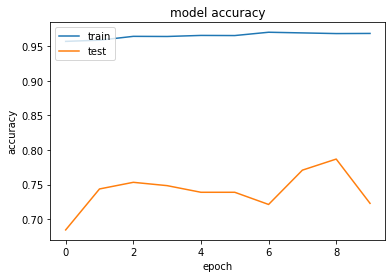

In [ ]:
# Graph the results
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(training_results.history['accuracy'])
plt.plot(training_results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# Tuned CNN
tuned_model = Sequential()
tuned_model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape=(img_width, img_height, 3)))
tuned_model.add(MaxPooling2D(pool_size=(2, 2)))
tuned_model.add(Conv2D(64, (3, 3), activation = 'relu'))
tuned_model.add(MaxPooling2D(pool_size=(2, 2)))
tuned_model.add(Conv2D(64, (3, 3), activation = 'relu'))
tuned_model.add(MaxPooling2D(pool_size=(2, 2)))

tuned_model.add(Flatten()) 
tuned_model.add(Dense(64)) 
tuned_model.add(Dense(1,activation='sigmoid'))

# need to compile the model before you can use it
opt = SGD(learning_rate=0.001, momentum=0.9)
tuned_model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Run the tuned CNN
# Run the baseline CNN
training_results = base_model.fit(
        train_data, #training set
        steps_per_epoch = len(train_data), 
        epochs = 10, #number of epochs 
        validation_data = test_data, #testing set
        validation_steps = len(test_data)
        )

Epoch 1/10
163/163 [==============================] - 256s 2s/step - loss: 0.0723 - accuracy: 0.9734 - val_loss: 0.9354 - val_accuracy: 0.7484
Epoch 2/10
163/163 [==============================] - 223s 1s/step - loss: 0.0681 - accuracy: 0.9743 - val_loss: 1.0181 - val_accuracy: 0.7436
Epoch 3/10
163/163 [==============================] - 221s 1s/step - loss: 0.0715 - accuracy: 0.9724 - val_loss: 0.5879 - val_accuracy: 0.8141
Epoch 4/10
163/163 [==============================] - 226s 1s/step - loss: 0.0673 - accuracy: 0.9743 - val_loss: 0.8656 - val_accuracy: 0.7676
Epoch 5/10
163/163 [==============================] - 227s 1s/step - loss: 0.0613 - accuracy: 0.9768 - val_loss: 0.9562 - val_accuracy: 0.7516
Epoch 6/10
163/163 [==============================] - 224s 1s/step - loss: 0.0570 - accuracy: 0.9801 - val_loss: 1.0243 - val_accuracy: 0.7580
Epoch 7/10
163/163 [==============================] - 223s 1s/step - loss: 0.0553 - accuracy: 0.9804 - val_loss: 1.2318 - val_accuracy: 0.7404

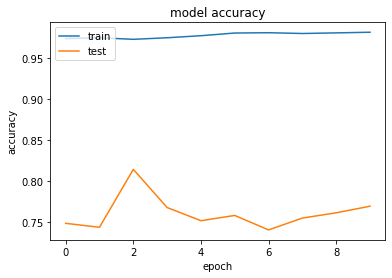

In [ ]:
# Graph the results
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(training_results.history['accuracy'])
plt.plot(training_results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

*The configuration of my CNN that proved to be more accurate was the tuned CNN. I think this is the case because the primary tuning I did was adding more depth, ,which would make sense as to why it increases accuracy. More computations and adjusting of the filters would make them more accurate.*

*I don't want to let this model run for 30 minutes each time I need to test if it gets more accurate, so I'll leave it with this accuracy and hopefully it measures up.*